In [1]:
#importing data from the website
import numpy as np

import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
#Understanding the data
train_set.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
#visualizaing the data
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


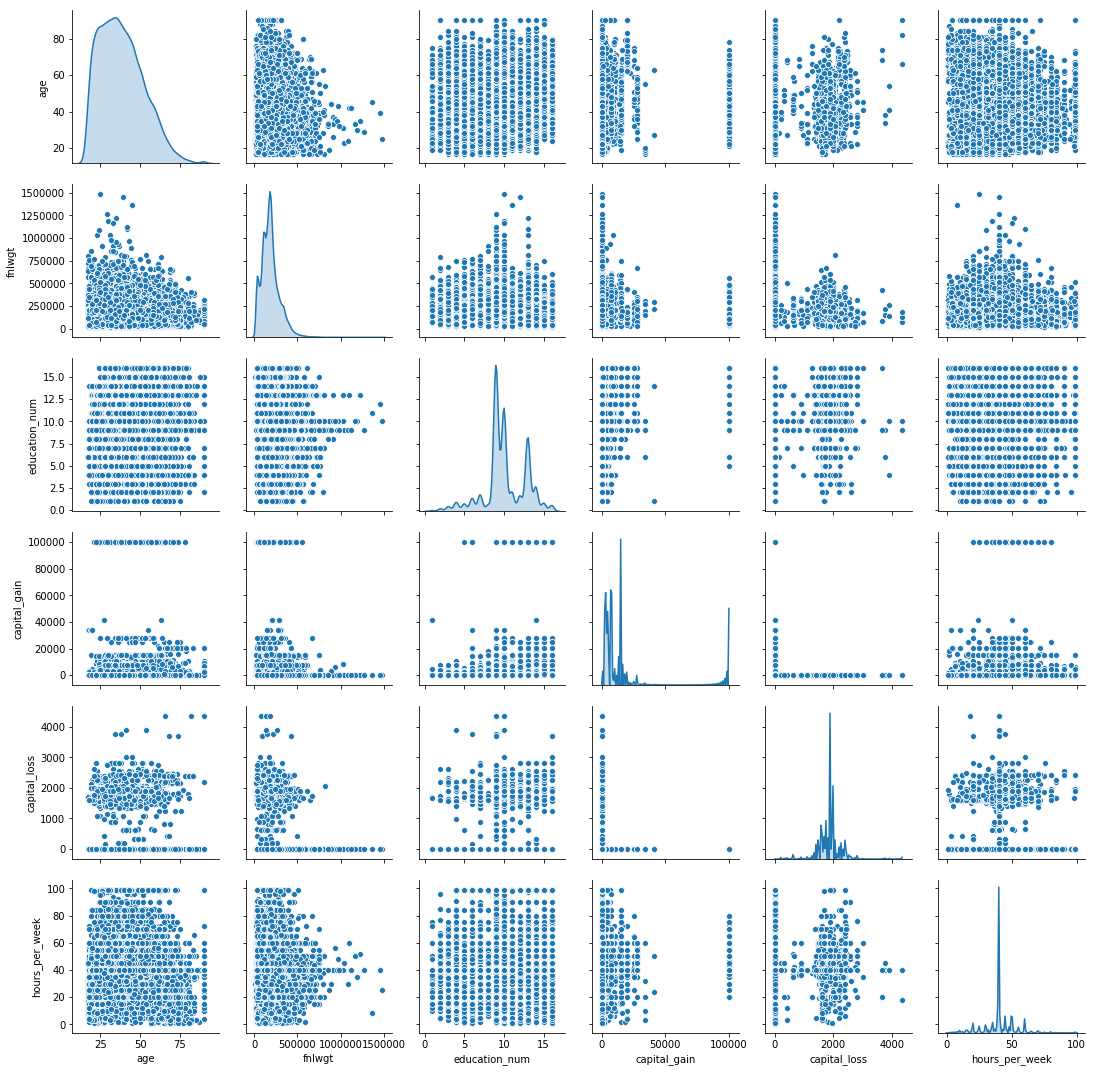

In [4]:
sns.pairplot(train_set,diag_kind='kde')

In [6]:
#checking whether our data has null or not
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
#checking how many categories we have
train_set.groupby(by='wage_class').sum()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
wage_class,,,,,,
<=50K,909294,4705226187,237190,3677161,1313693,960130
>50K,346963,1474147205,91047,31412163,1529007,356554


In [8]:
train_set.groupby(by='workclass').sum()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
workclass,,,,,,
?,75203,346115997,17002,1114077,111556,58604
Federal-gov,40887,177812394,10535,799903,107778,39724
Local-gov,87385,394822919,23111,1842264,229925,85777
Never-worked,144,1581927,52,0,0,199
Private,835158,4374974348,224230,20181687,1815878,913902
Self-emp-inc,51355,196395180,12429,5441274,173135,54481
Self-emp-not-inc,114268,446221558,25985,4792483,296361,112876
State-gov,51188,239009324,14766,910806,108067,50663
Without-pay,669,2439745,127,6830,0,458


In [9]:
#how many features are categorical
train_set.loc[:,train_set.dtypes==np.object]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [10]:
#spliting the data
x_train=train_set.drop(labels='wage_class', axis=1)
y_train= train_set['wage_class']

In [11]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
x_test=test_set.drop(labels='wage_class', axis=1)
y_test= test_set['wage_class']

In [13]:
x_test_cat=x_test[x_test.select_dtypes(include=['object']).columns]

In [14]:
x_test_cat

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States
6,?,HS-grad,Never-married,?,Unmarried,Black,Male,United-States
7,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
8,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,United-States
9,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [15]:
x_test_num=x_test[x_test.select_dtypes(exclude=['object']).columns]
x_test_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
5,34,198693,6,0,0,30
6,29,227026,9,0,0,40
7,63,104626,15,3103,0,32
8,24,369667,10,0,0,40
9,55,104996,4,0,0,10


In [16]:
x_test.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [17]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [18]:
x_train_num=x_test[x_train.select_dtypes(exclude=['object']).columns]
x_train_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
5,34,198693,6,0,0,30
6,29,227026,9,0,0,40
7,63,104626,15,3103,0,32
8,24,369667,10,0,0,40
9,55,104996,4,0,0,10


In [25]:
df_2 = pd.get_dummies(x_test_cat,drop_first=True)

In [31]:
x_test_code = pd.get_dummies(x_test,drop_first=True)

In [57]:
y_test_code=pd.get_dummies(y_test,drop_first=True)

In [59]:
y_test_code.describe()

,>50K.
count,16281.000000
mean,0.236226
std,0.424776
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [72]:
y_test_code.iloc[:,0].value_counts()

0    12435
1     3846
Name:  >50K., dtype: int64

In [73]:
#converting categorical data into binary one hot encoding
x_train_code = pd.get_dummies(x_train,drop_first=True)
y_train_code=pd.get_dummies(y_train,drop_first=True)

In [93]:
#training and testing data has columns mismatch so we are removing it
list(x_train_code.columns)

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupati

In [90]:
x_test_code.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Force

In [100]:
#findinf out which column is missing
temp1=list(x_train_code.columns) 
temp2=list(x_test_code.columns)
temp3 = [item for item in temp1 if item not in temp2]
temp3

['native_country_ Holand-Netherlands']

In [127]:
x_test_code.columns.get_loc('native_country_ Holand-Netherlands')

73

In [128]:
x_train_code.columns.get_loc('native_country_ Holand-Netherlands')

73

In [102]:
#adding a zero column 
x_test_code['native_country_ Holand-Netherlands']=0

In [103]:
x_test_code.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_ Holand-Netherlands
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
y_train_code.iloc[:,0].value_counts()

0    24720
1     7841
Name:  >50K, dtype: int64

In [105]:
y_test_code.columns[0]

' >50K.'

In [106]:
y_test_code.dtypes

 >50K.    uint8
dtype: object

In [107]:
#trying out random forest classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train_code,y_train_code)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
rnd_clf.score(x_train_code,y_train_code)

0.9874389607198796

In [109]:
rnd_clf.score(x_test_code,y_test_code)

0.8478594680916406

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x_train_code)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [130]:
#trying XGBoost
# fit model no training data
model2 = XGBClassifier(objective='binary:logistic')
model2.fit(scaled_data,y_train_code)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [132]:
model2.score(scaled_data,y_train_code)

0.9028592487945702

In [133]:
scaled_data_test=scaler.fit_transform(x_test_code)
model2.score(scaled_data_test,y_test_code)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.8642589521528161

In [110]:
#trying XGBoost
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train_code,y_train_code)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [116]:
# cheking training accuracy
y_pred = model.predict(x_train_code)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train_code,predictions)
accuracy

0.9028592487945702

In [119]:
x_test_code=x_test_code[x_train_code.columns]

In [120]:
model.score(x_test_code,y_test_code)

0.8722437196732388